
# EDA on time series dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import pandas_datareader as pdr

In [26]:
!pip install pandas_datareader

In [31]:
df=pd.read_csv("TSLA.csv",index_col='Date',parse_dates=True)

In [32]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200
2022-02-25,269.743347,273.166656,260.799988,269.956665,269.956665,76067700
2022-02-28,271.670013,292.286682,271.570007,290.143341,290.143341,99006900


In [33]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,194.419998,196.300003,187.610001,194.639999,194.639999,172475500
2023-02-14,191.940002,209.820007,189.440002,209.250000,209.250000,216455700
2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500
2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200


<AxesSubplot:xlabel='Date'>

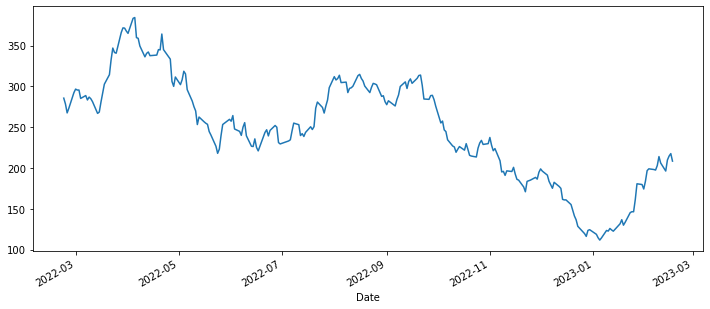

In [34]:
df['High'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

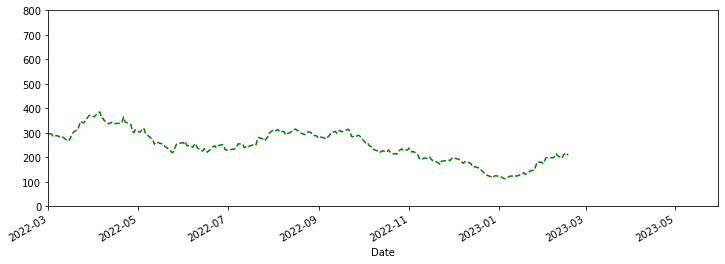

In [43]:
## plotting x and y limit

df[ 'High'].plot(xlim= ['2022-03-01', '2023-05-30 '], ylim= [0, 800], figsize=(12,4),c='green',ls='--')

In [45]:
df.index

DatetimeIndex(['2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07',
               ...
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [51]:
index=df.loc['2022-03-01':'2023-05-30'].index
share_open=df.loc['2022-03-01':'2023-05-30']['Open']

In [52]:
share_open

Date
2022-03-01    289.893341
2022-03-02    290.709991
2022-03-03    292.923340
2022-03-04    283.033325
2022-03-07    285.433319
                 ...    
2023-02-13    194.419998
2023-02-14    191.940002
2023-02-15    211.759995
2023-02-16    210.779999
2023-02-17    199.990005
Name: Open, Length: 245, dtype: float64

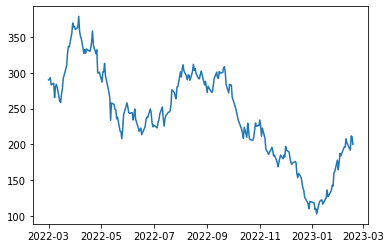

In [54]:
figure,axis=plt.subplots()
axis.plot(index,share_open)

In [55]:
##Date time index

In [58]:
df=df.reset_index()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [60]:
pd.to_datetime(df['Date'])

0     2022-02-22
1     2022-02-23
2     2022-02-24
3     2022-02-25
4     2022-02-28
         ...    
245   2023-02-13
246   2023-02-14
247   2023-02-15
248   2023-02-16
249   2023-02-17
Name: Date, Length: 250, dtype: datetime64[ns]

In [64]:
df=df.set_index('Date',drop=True)

In [65]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200
2022-02-25,269.743347,273.166656,260.799988,269.956665,269.956665,76067700
2022-02-28,271.670013,292.286682,271.570007,290.143341,290.143341,99006900


In [66]:
## Time resampling

In [67]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200
2022-02-25,269.743347,273.166656,260.799988,269.956665,269.956665,76067700
2022-02-28,271.670013,292.286682,271.570007,290.143341,290.143341,99006900


In [69]:
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-31,110.349998,116.269997,108.239998,109.099998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,108.099998,138429900


In [70]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-31,378.766663,384.290009,362.433319,381.816681,381.816681,221923300
2023-12-31,211.759995,217.649994,206.110001,214.240005,214.240005,305632100


<AxesSubplot:xlabel='Date'>

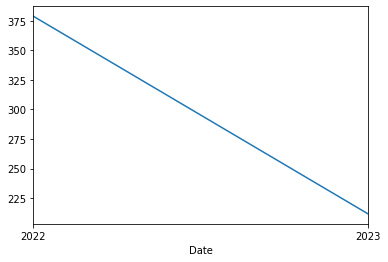

In [72]:
## rule means yead end frequency
df.resample(rule='A').max()['Open'].plot()

In [73]:
df.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,369.329987,371.589996,361.333344,366.523346,366.523346,135322200
2022-04-01,378.766663,384.290009,362.433319,381.816681,381.816681,144973200
2022-07-01,311.666656,314.666656,305.579987,309.320007,309.320007,142032300
2022-10-01,254.500000,257.500000,242.009995,249.440002,249.440002,221923300
2023-01-01,211.759995,217.649994,206.110001,214.240005,214.240005,305632100


<AxesSubplot:xlabel='Date'>

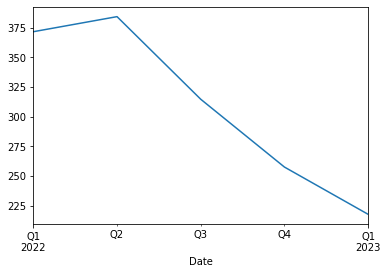

In [75]:
## quaterly
df.resample(rule='QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

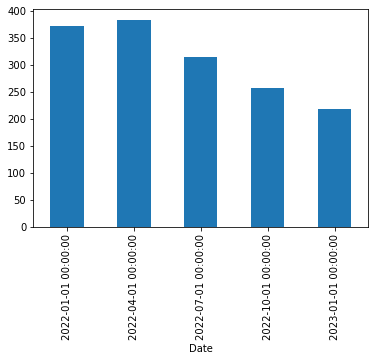

In [76]:
## quaterly
df.resample(rule='QS').max()['High'].plot(kind='bar')

<AxesSubplot:xlabel='Date'>

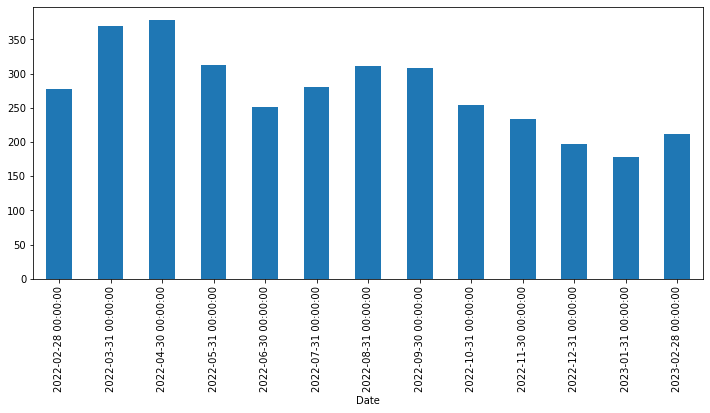

In [80]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(12,5))